# Chapter 1: Introduction to Clustering

### Implementing K-Means from Scratch

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [24]:
# Generate a random cluster dataset to experiment on. X = coordinate points, y = cluster labels
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, random_state=800)

#### What does the data look like?

In [25]:
X

array([[-3.83458347,  6.09210705],
       [-4.62571831,  5.54296865],
       [-2.87807159, -7.48754592],
       ...,
       [-3.709726  , -7.77993633],
       [-8.44553266, -1.83519866],
       [-4.68308431,  6.91780744]])

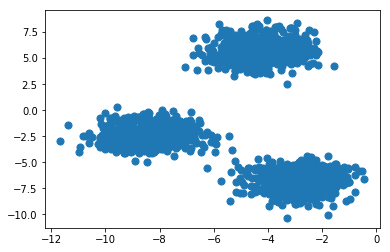

In [26]:
# Plotting just the coordinate points
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='tab20b')

In [27]:
# Labels come by default - disregard them for this exercise...
y

array([2, 2, 1, ..., 1, 0, 2])

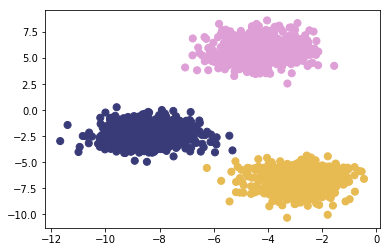

In [28]:
# For reference, plotting the coordinate points with the correct cluster labels
plt.scatter(X[:, 0], X[:, 1], c=y,s=50, cmap='tab20b')

#### Let's recreate the above results on our own! Below we go over an example of how you would implement this entirely from scratch, and then with some optimizations

#### Step 1

In [29]:
# Implementation of Euclidean distance

def dist(a, b):
    return np.sqrt((a[0]-b[0]**2 + (a[1]-b[1])**2))

In [30]:
# Example Centroids
centroids = [[1,2],[3,4],[5,6]]

In [31]:
# Example points in X
X[105:110]

array([[-3.09897933,  4.79407445],
       [-3.37295914, -7.36901393],
       [-3.372895  ,  5.10433846],
       [-5.90267987, -3.28352194],
       [-3.52067739,  7.7841276 ]])

In [32]:
# An example pass through calculating distances and choosing the index of the smallest distance as cluster
for x in X[0:5]:
    calcs = []
    for c in centroids:
        calcs.append(dist(x, c))
        print np.argmin(calcs, axis=0)

0
1
1
0
1
1
0
0
0
0
0
0
0
0
0


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


#### Now that you've seen a barebones implementation, lets use optimized distance packages to speed up the process...

In [33]:
# Barebones Euclidean distance for reference
def dist(a, b):
    return np.sqrt((a[0]-b[0]**2 + (a[1]-b[1])**2))

In [34]:
# Optimized Euclidean distance implementation
from scipy.spatial.distance import cdist

In [35]:
def k_means(X, K):
    # Keep track of history so you can see K-Means in action
    centroids_history = []
    labels_history = []
    
    # Randomly initialize Kcentroids
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    
    # While loop repeats process until difference between new/old centroids = 0 
    while True:
        # Euclidean distances are calculated for each point relative to centroids, and then np.argmin returns
        # the index location of the minimal distance - which cluster a point is assigned to
        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
        
        # Take mean of points within clusters to find new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                for i in range(K)])
        centroids_history.append(new_centroids)
        
        # If old centroids and new centroids no longer change, K-Means is complete and end. Otherwise continue
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

In [36]:
centers, labels, centers_hist, labels_hist = k_means(X, 3)

#### Visualize the steps of your K-Means implementation

In [37]:
history = zip(centers_hist, labels_hist)

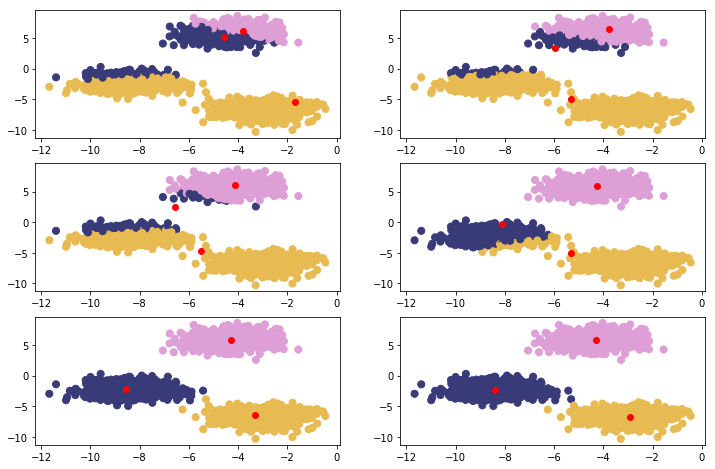

In [39]:
n = 321
for x, y in history:
    plt.figure(1, figsize=(12,8))
    if n == 327:
        plt.show()
    else:
        plt.subplot(n)
        plt.scatter(X[:, 0], X[:, 1], c=y,
                s=50, cmap='tab20b');
        plt.scatter(x[:, 0], x[:, 1], c='red')
        n += 1

## K-Means Using Sci-Kit Learn

Now that you know how K-Means works, rest assured that you don't have to recreate it every time you want to use it. The popular Sci-Kit Learn package has this unsupervised learning algorithm built in for easy deployment!

In [21]:
km = KMeans(3)

In [22]:
sci_kit_y = km.fit(X).predict(X)

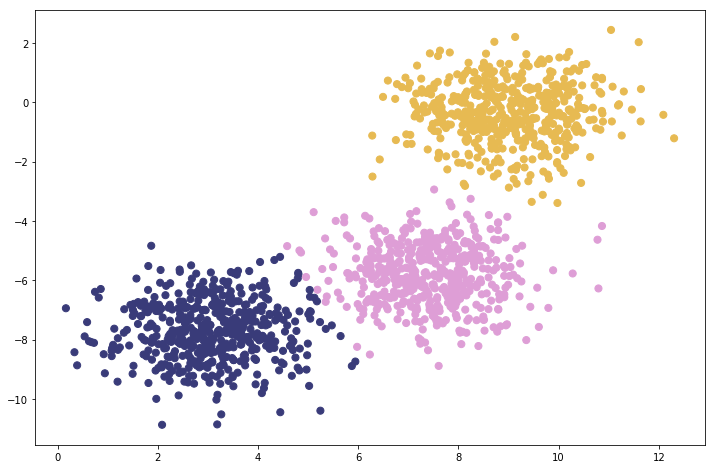

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c = sci_kit_y ,s=50, cmap='tab20b')

That's it! Just 3 lines of code and your K-Means clustering is good to go.